<a href="https://colab.research.google.com/github/ShaktiMS/MLDL-expt-2/blob/main/Expt_2_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.columns = df.columns.str.strip() # Remove whitespace
df = df.drop(['Country', 'Year'], axis=1) # Drop identifiers
df.fillna(df.mean(numeric_only=True), inplace=True) # Handle Missing Values
df = pd.get_dummies(df, columns=['Status'], drop_first=True) # One-Hot Encoding

In [ ]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, random_state=42)

In [ ]:
lasso_cv.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.613e+03, tolerance: 2.145e+01
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.38949549e-0...
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
        cv=5, random_state=42)

In [ ]:
print(f"Optimal Alpha (Hyperparameter) found: {lasso_cv.alpha_:.5f}")
y_pred = lasso_cv.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Lasso RMSE: {rmse:.2f} years")
print(f"Lasso R² Score: {r2:.2f}")

Optimal Alpha (Hyperparameter) found: 0.00010
Lasso RMSE: 3.90 years
Lasso R² Score: 0.82


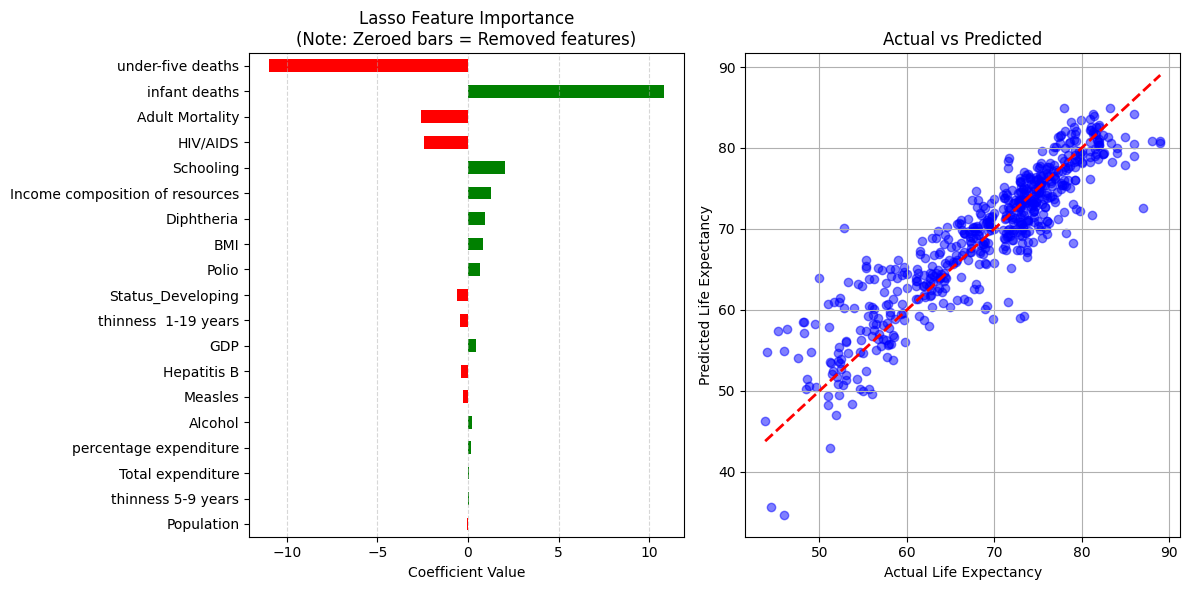


Features eliminated by Lasso (Coeff ~ 0):
[]


In [ ]:
plt.figure(figsize=(12, 6))

# Plot 1: Feature Importance (Coefficients)
# This shows which features Lasso kept and which it turned to ZERO.
coefs = pd.Series(lasso_cv.coef_, index=X.columns)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=True).index)

plt.subplot(1, 2, 1)
coefs_sorted.plot(kind='barh', color=(coefs_sorted > 0).map({True: 'green', False: 'red'}))
plt.title(f"Lasso Feature Importance\n(Note: Zeroed bars = Removed features)")
plt.xlabel("Coefficient Value")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Plot 2: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Identity line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.savefig('lasso_results.png') # Save graph
plt.show()

# Print Features that were eliminated (Coefficient = 0)
print("\nFeatures eliminated by Lasso (Coeff ~ 0):")
print(coefs[coefs == 0].index.tolist())